In [21]:
import cv2
import matplotlib.pyplot as plt

In [22]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [23]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [24]:
classlabels=[]
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classlabels=fpt.read().rstrip('\n').split('\n')

In [25]:
print(classlabels)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [26]:
print(len(classlabels))


80


In [27]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((27.5,127,5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000024180ADDB50>

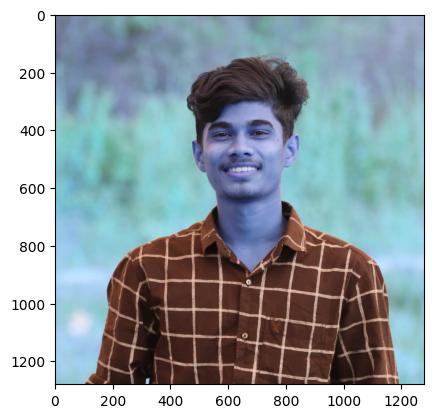

In [28]:
img=cv2.imread('boy.jpg')
plt.imshow(img)

In [29]:
ClassIndex,confidece,bbox=model.detect(img,confThreshold=0.5)

In [30]:
print(ClassIndex)

[1]


In [31]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(), confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40),font, fontScale=font_scale,color=(0,255,0),thickness=3)


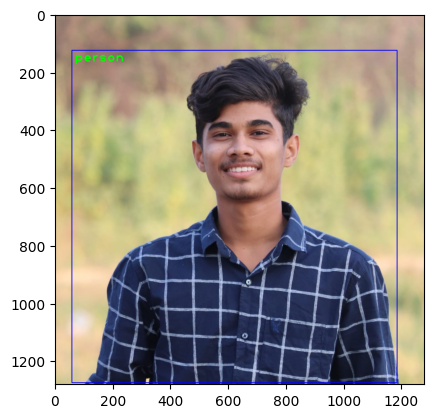

In [32]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [33]:
#for video

cap= cv2.VideoCapture('baby.mp4')

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('cant open the video')

font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame=cap.read()
    ClassIndex,confidece,bbox= model.detect(frame , confThreshold=0.45)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd , conf , boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=50):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40),font, fontScale=font_scale,color=(0,255,0),thickness=3)

    cv2.imshow('objectiondetection by Raghu',frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        
        break
cap.release()
cv2.destroyAllWindows()

              
        

[1]
[1 3]
[1]
[1]
[1 1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
